# Online Vehicle Booking - Marker Segmentation

### Objective
As a team developing a ride-booking platform, our goal is to analyze historical ride data to uncover distinct customer and service segments. Insights from this segmentation will guide product positioning, pricing strategies, and marketing outreach to maximize adoption and profitability.

In [66]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset

In [67]:
df = pd.read_csv(r"C:\Users\user\Downloads\rides_data.csv")

In [68]:
df.head()

,services,date,time,ride_status,source,destination,duration,ride_id,distance,ride_charge,misc_charge,total_fare,payment_method
0,cab economy,2024-07-15,08:30:40.542646,completed,Balagere Harbor,Harohalli Nagar,39,RD3161218751875354,27.21,764.83,31.51,796.34,Amazon Pay
1,auto,2024-07-05,23:36:51.542646,completed,Basavanagudi 3rd Block,Bikasipura 1st Stage,89,RD8171514284594096,34.03,314.83,49.52,364.35,Paytm
2,auto,2024-07-23,11:05:37.542646,cancelled,Babusapalya Cove,Kothaguda Terrace,25,RD9376481122237926,20.24,NaN,NaN,NaN,NaN
3,cab economy,2024-06-24,08:45:10.542646,completed,Mahadevapura Mews,Kanakapura Arc,89,RD3676889143182765,31.17,484.73,15.84,500.57,QR scan
4,cab economy,2024-07-15,00:26:44.542646,completed,Ganganagar Cove,Basaveshwaranagar Colony,95,RD6639410275948084,27.21,663.50,14.13,677.63,Amazon Pay


### Exploratory Data Analysis

In [4]:
df.columns

Index(['services', 'date', 'time', 'ride_status', 'source', 'destination',
       'duration', 'ride_id', 'distance', 'ride_charge', 'misc_charge',
       'total_fare', 'payment_method'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   services        50000 non-null  object 
 1   date            50000 non-null  object 
 2   time            50000 non-null  object 
 3   ride_status     50000 non-null  object 
 4   source          50000 non-null  object 
 5   destination     50000 non-null  object 
 6   duration        50000 non-null  int64  
 7   ride_id         50000 non-null  object 
 8   distance        50000 non-null  float64
 9   ride_charge     44964 non-null  float64
 10  misc_charge     44964 non-null  float64
 11  total_fare      44964 non-null  float64
 12  payment_method  44964 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 5.0+ MB


In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   services        50000 non-null  object        
 1   date            50000 non-null  datetime64[ns]
 2   time            50000 non-null  object        
 3   ride_status     50000 non-null  object        
 4   source          50000 non-null  object        
 5   destination     50000 non-null  object        
 6   duration        50000 non-null  int64         
 7   ride_id         50000 non-null  object        
 8   distance        50000 non-null  float64       
 9   ride_charge     44964 non-null  float64       
 10  misc_charge     44964 non-null  float64       
 11  total_fare      44964 non-null  float64       
 12  payment_method  44964 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(7)
memory usage: 5.0+ MB


In [8]:
df.isnull().sum()

services             0
date                 0
time                 0
ride_status          0
source               0
destination          0
duration             0
ride_id              0
distance             0
ride_charge       5036
misc_charge       5036
total_fare        5036
payment_method    5036
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

services          0
date              0
time              0
ride_status       0
source            0
destination       0
duration          0
ride_id           0
distance          0
ride_charge       0
misc_charge       0
total_fare        0
payment_method    0
dtype: int64

In [11]:
df.groupby('services')[['total_fare','distance','duration']].mean()

,total_fare,distance,duration
services,,,
auto,548.833122,25.531252,65.043639
bike,547.857592,25.353878,64.036338
bike lite,544.147810,25.646167,63.972425
cab economy,547.248911,25.498173,64.183537
parcel,546.393086,25.649846,64.417519


In [13]:
df.head(2)

,services,date,time,ride_status,source,destination,duration,ride_id,distance,ride_charge,misc_charge,total_fare,payment_method
0,cab economy,2024-07-15,08:30:40.542646,completed,Balagere Harbor,Harohalli Nagar,39,RD3161218751875354,27.21,764.83,31.51,796.34,Amazon Pay
1,auto,2024-07-05,23:36:51.542646,completed,Basavanagudi 3rd Block,Bikasipura 1st Stage,89,RD8171514284594096,34.03,314.83,49.52,364.35,Paytm


In [14]:
df.shape

(44964, 13)

In [65]:
#Ride Status
df['ride_status'].value_counts()

ride_status
completed    44964
Name: count, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_12556\2929115909.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ride_status_counts.index, y=ride_status_counts.values, palette='Set2')


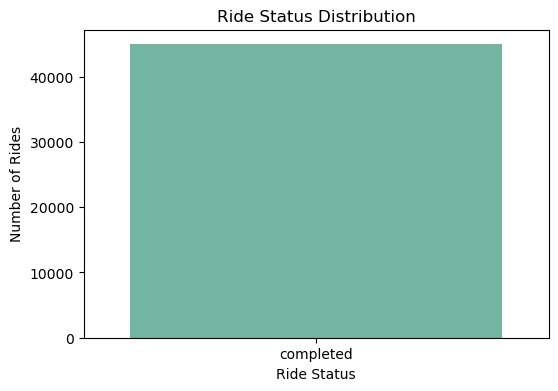

In [23]:
#Ride Status Distribution
ride_status_counts = df['ride_status'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=ride_status_counts.index, y=ride_status_counts.values, palette='Set2')
plt.title('Ride Status Distribution')
plt.ylabel('Number of Rides')
plt.xlabel('Ride Status')
plt.show()

In [16]:
df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].dt.day_name()

In [17]:
df.head(2)

,services,date,time,ride_status,source,destination,duration,ride_id,distance,ride_charge,misc_charge,total_fare,payment_method,day_of_week
0,cab economy,2024-07-15,08:30:40.542646,completed,Balagere Harbor,Harohalli Nagar,39,RD3161218751875354,27.21,764.83,31.51,796.34,Amazon Pay,Monday
1,auto,2024-07-05,23:36:51.542646,completed,Basavanagudi 3rd Block,Bikasipura 1st Stage,89,RD8171514284594096,34.03,314.83,49.52,364.35,Paytm,Friday


In [18]:
df.groupby('day_of_week')[['total_fare','distance','duration']].mean()

,total_fare,distance,duration
day_of_week,,,
Friday,549.329625,25.144560,63.658011
Monday,545.557494,25.757546,64.640216
Saturday,548.936323,25.570512,64.214443
Sunday,548.731709,25.657569,64.631508
Thursday,546.123399,25.415020,64.546783
Tuesday,547.905451,25.422266,64.121039
Wednesday,545.488715,25.553766,64.761065


In [19]:
df[df['day_of_week']=='Sunday']['total_fare'].mean()

548.7317089249493

In [25]:
df['services'].value_counts()

services
bike           13567
auto           11114
cab economy     9148
parcel          6747
bike lite       4388
Name: count, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_12556\2363384142.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=service_counts.index, y=service_counts.values, palette='Set1')


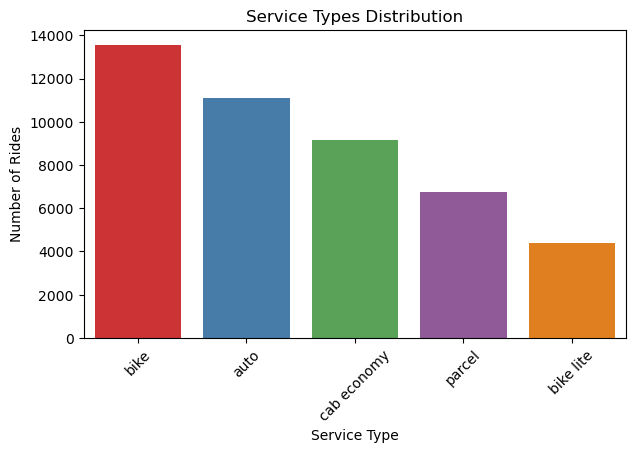

In [26]:
# Service Type Distribution
service_counts = df['services'].value_counts()
plt.figure(figsize=(7,4))
sns.barplot(x=service_counts.index, y=service_counts.values, palette='Set1')
plt.title('Service Types Distribution')
plt.ylabel('Number of Rides')
plt.xlabel('Service Type')
plt.xticks(rotation=45)
plt.show()

In [12]:
df['payment_method'].value_counts()

payment_method
Paytm         11315
GPay          11268
Amazon Pay    11225
QR scan       11156
Name: count, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_12556\1504180710.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_methods.index, y=payment_methods.values, palette='Set3')


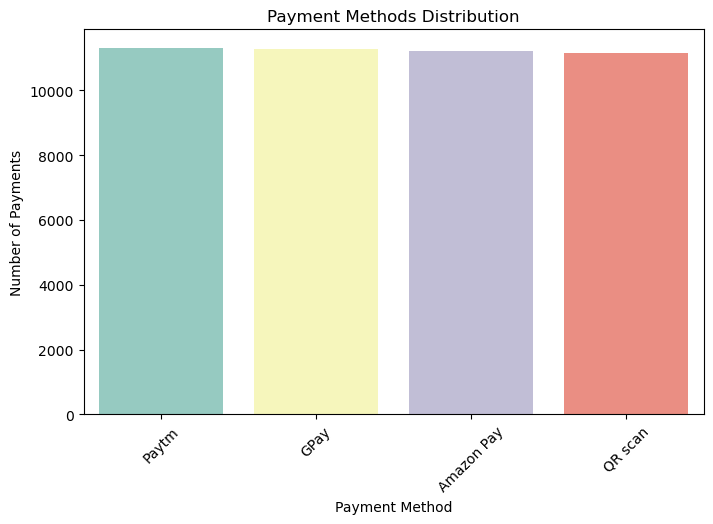

In [29]:
# Payment Method Distribution (only completed rides)
payment_methods = df[df['ride_status']=='completed']['payment_method'].value_counts()
plt.figure(figsize=(8,5))
sns.barplot(x=payment_methods.index, y=payment_methods.values, palette='Set3')
plt.title('Payment Methods Distribution')
plt.ylabel('Number of Payments')
plt.xlabel('Payment Method')
plt.xticks(rotation=45)
plt.show()

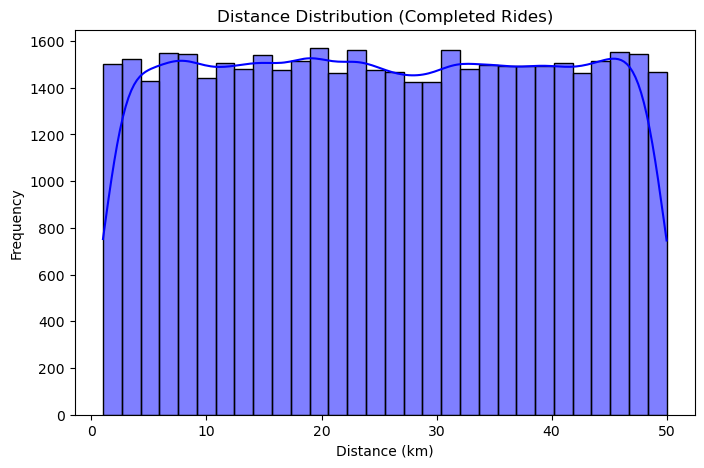

In [31]:
# Distance Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['distance'], kde=True, bins=30, color='blue')
plt.title('Distance Distribution (Completed Rides)')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.show()

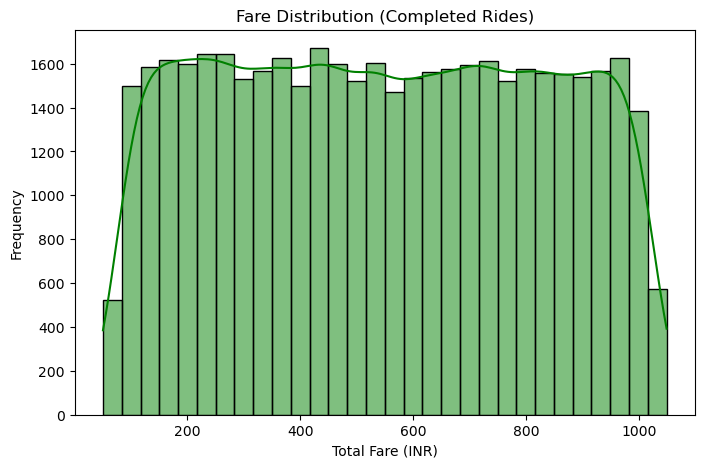

In [33]:
#Fare Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['total_fare'], kde=True, bins=30, color='green')
plt.title('Fare Distribution (Completed Rides)')
plt.xlabel('Total Fare (INR)')
plt.ylabel('Frequency')
plt.show()

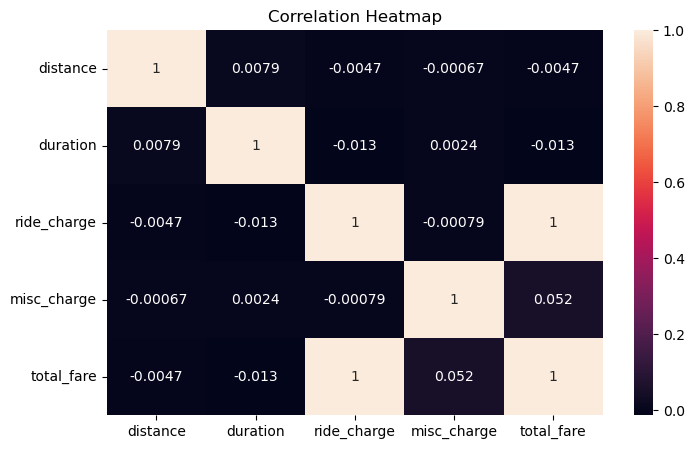

In [39]:
#Correlation Heatmap
plt.figure(figsize=(8,5))
corr = df[['distance', 'duration', 'ride_charge', 'misc_charge', 'total_fare']].corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap')
plt.show()

### Data preprocessing

In [45]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['services_encoded'] = le.fit_transform(df['services'])
df['payment_method_encoded'] = le.fit_transform(df['payment_method'])
df['day_encoded'] = le.fit_transform(df['day_of_week'])

In [46]:
df.head(2)

,services,date,time,ride_status,source,destination,duration,ride_id,distance,ride_charge,misc_charge,total_fare,payment_method,day_of_week,services_encoded,payment_method_encoded,day_encoded
0,cab economy,2024-07-15,08:30:40.542646,completed,Balagere Harbor,Harohalli Nagar,39,RD3161218751875354,27.21,764.83,31.51,796.34,Amazon Pay,Monday,3,0,1
1,auto,2024-07-05,23:36:51.542646,completed,Basavanagudi 3rd Block,Bikasipura 1st Stage,89,RD8171514284594096,34.03,314.83,49.52,364.35,Paytm,Friday,0,2,0


In [47]:
features = df[['services_encoded', 'duration', 'distance', 'total_fare', 'payment_method_encoded', 'day_encoded']]

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [49]:
import warnings
warnings.filterwarnings('ignore')

### KMeans Clustering

In [52]:
from sklearn.cluster import KMeans

# Elbow method to find optimal clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

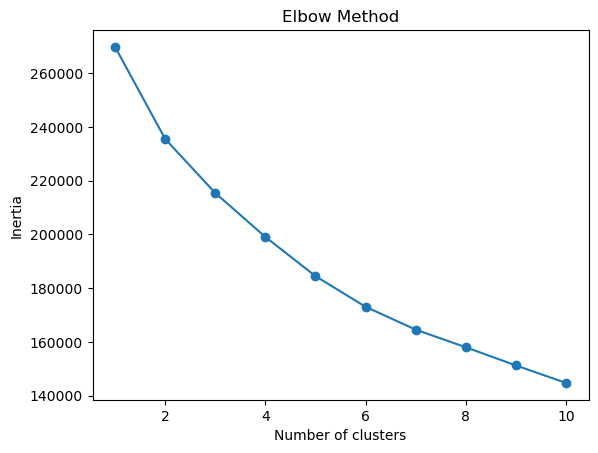

In [53]:
# Plot elbow graph
import matplotlib.pyplot as plt
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [54]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans


scores = []
K_range = range(2, 10)  # Test different K values

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, labels)  # Calculate correct Silhouette Score
    scores.append(score)

In [55]:
scores

[0.1260727758904047,
 0.11039780241357892,
 0.11803810153804355,
 0.1207834714514527,
 0.1265954060766836,
 0.1233599742082295,
 0.12569870126151814,
 0.12744015503180506]

In [56]:
pd.Series(scores).diff()

0         NaN
1   -0.015675
2    0.007640
3    0.002745
4    0.005812
5   -0.003235
6    0.002339
7    0.001741
dtype: float64

In [57]:
# k = 6
kmeans = KMeans(n_clusters=6, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

In [58]:
df.head(2)

,services,date,time,ride_status,source,destination,duration,ride_id,distance,ride_charge,misc_charge,total_fare,payment_method,day_of_week,services_encoded,payment_method_encoded,day_encoded,Cluster
0,cab economy,2024-07-15,08:30:40.542646,completed,Balagere Harbor,Harohalli Nagar,39,RD3161218751875354,27.21,764.83,31.51,796.34,Amazon Pay,Monday,3,0,1,0
1,auto,2024-07-05,23:36:51.542646,completed,Basavanagudi 3rd Block,Bikasipura 1st Stage,89,RD8171514284594096,34.03,314.83,49.52,364.35,Paytm,Friday,0,2,0,5


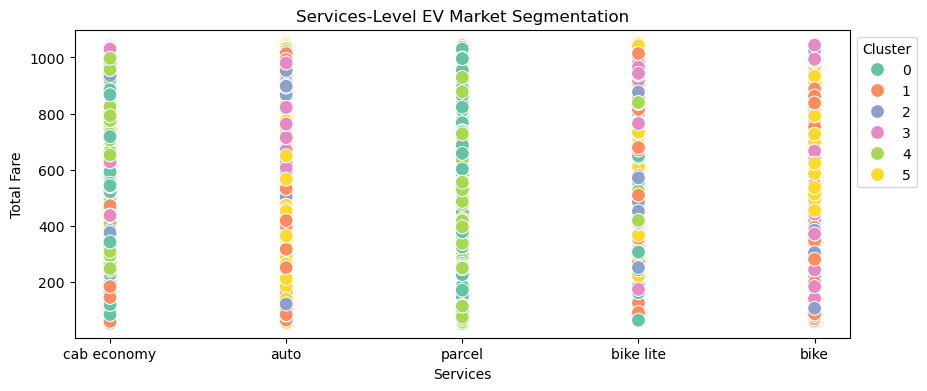

In [59]:
# Visualizing clusters
plt.figure(figsize=(10, 4))
sns.scatterplot(
    x=df['services'],
    y=df['total_fare'],
    hue=df['Cluster'],
    palette='Set2',
    s=100
)
plt.xlabel("Services")
plt.ylabel("Total Fare")
plt.title("Services-Level EV Market Segmentation")
plt.legend(title="Cluster",loc='upper left', bbox_to_anchor=(1, 1))
plt.show()